In [1]:
import yfinance as yf

In [132]:
data = yf.download(
    tickers = "NFLX",
    period = "1y",
    interval = "1d",
    ignore_tz = True,
    prepost = False
)

[*********************100%***********************]  1 of 1 completed


In [121]:
from matplotlib import pyplot as plt

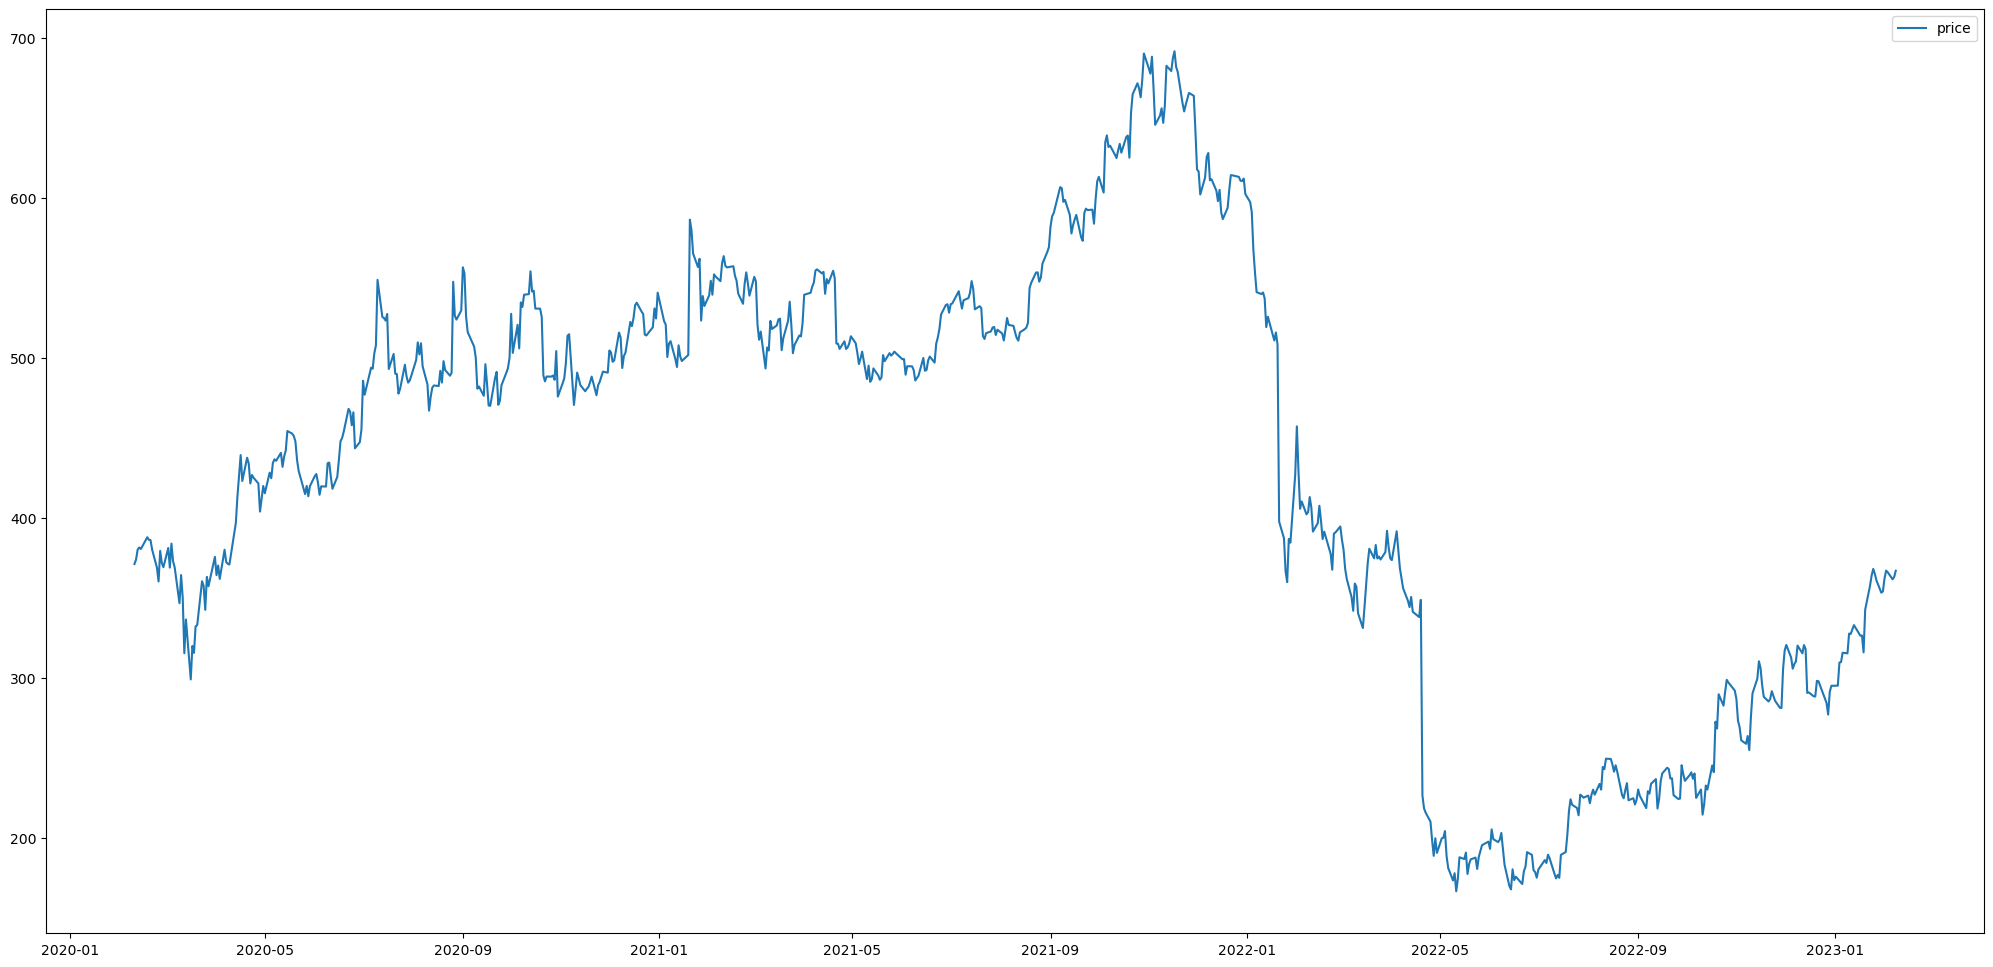

In [122]:
plt.figure(figsize=(25,12))
plt.plot(data['Adj Close'], label='price')
plt.legend()

In [123]:
import numpy as np

In [128]:
def ma(values: list, v=30):
    mas = []
    for i in range(len(values)):
        if v > i:
            mas.append(np.mean(values[:i+1]))
        else:
            mas.append(np.mean(values[i-v:i]))
    return mas

In [129]:
def norm(data, mode='minmax'):
    if mode == 'minmax':
        return (data - data.min()) / (data.max() - data.min())
    elif mode == 'sum':
        return data / data.sum()

In [133]:
ma_list = [5,20]
for v in ma_list:
    data[f'ma_{v}'] = ma(data['Adj Close'], v=v)

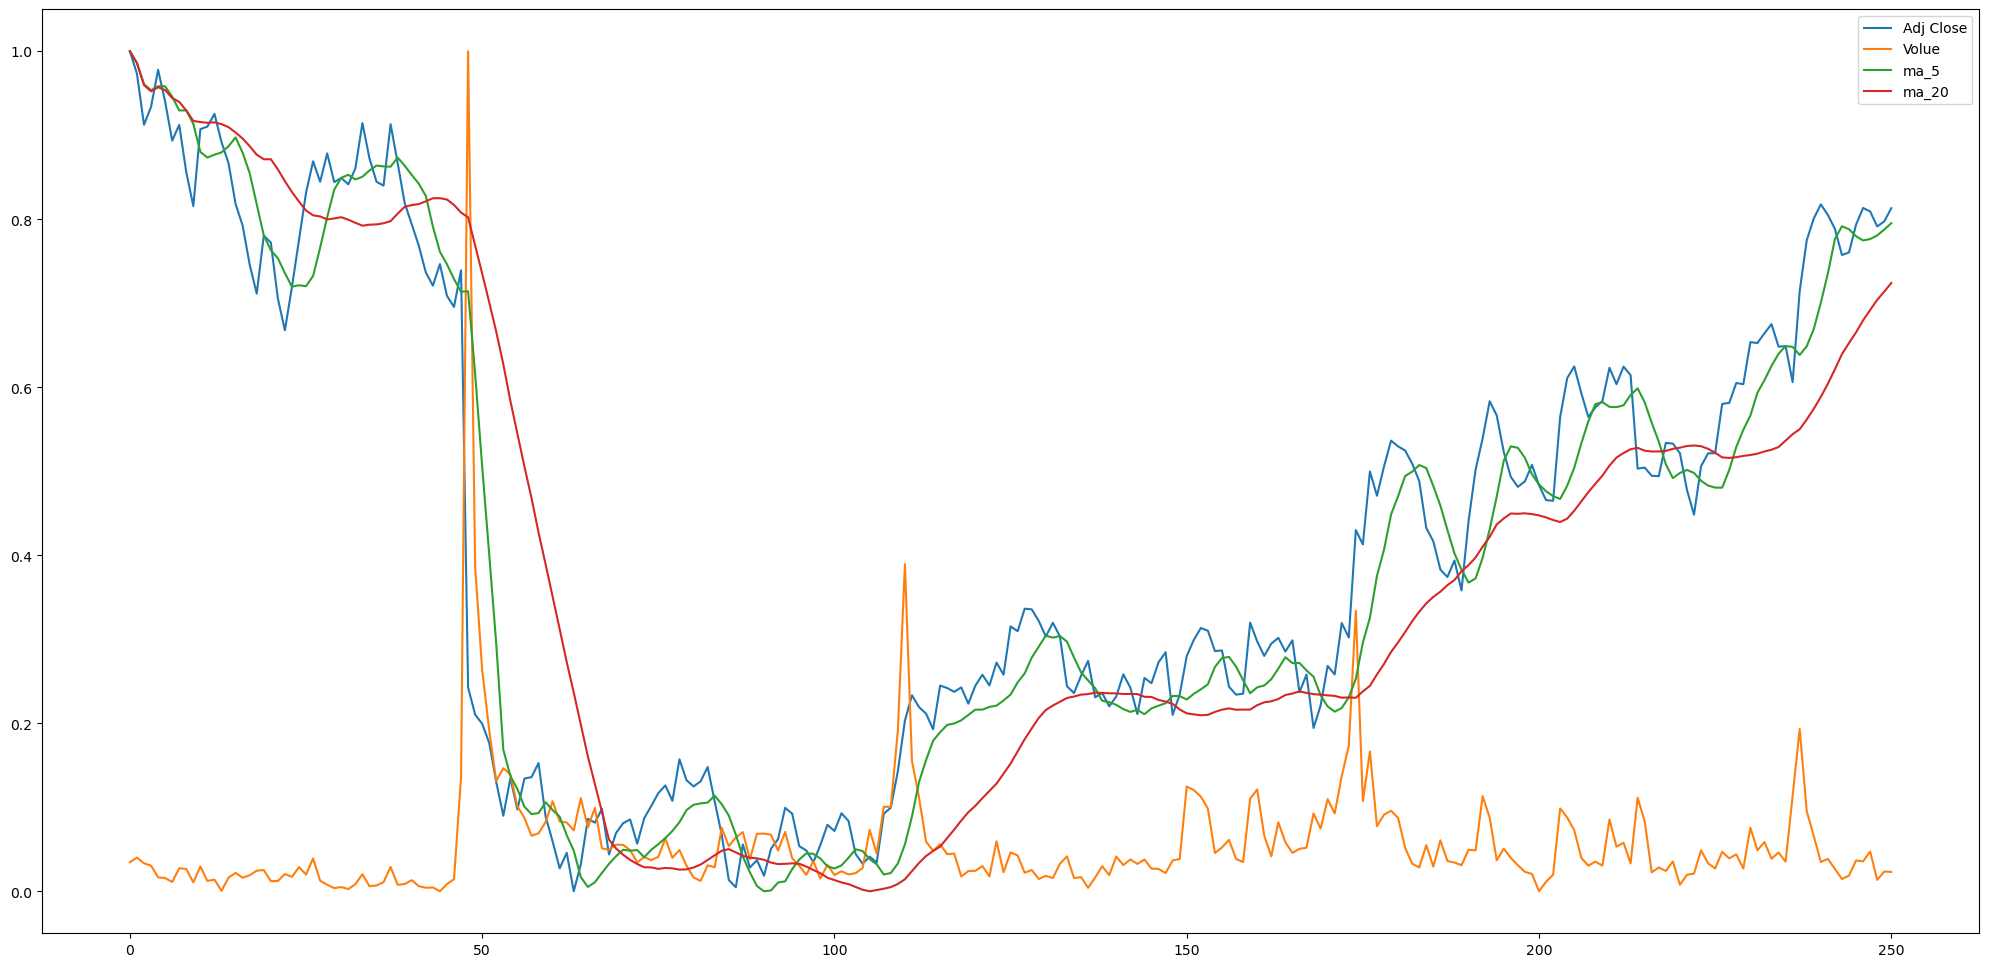

In [134]:
plt.figure(figsize=(25,12))
plt.plot(norm(data['Adj Close']).tolist(), label='Adj Close')
plt.plot(norm(data['Volume']).tolist(), label='Volue')

for v in ma_list:
    plt.plot(norm(data[f'ma_{v}']).tolist(), label=f'ma_{v}')
plt.legend()